In [35]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.linalg import matrix_power
import csv
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
KG = nx.read_gpickle("training_KG_concepts.gpickle")

In [14]:
degree_sequence = sorted([d for n, d in KG.degree()], reverse=True)

In [37]:
print("Edges: ", len(list(KG.edges(data=True))))
print("Nodes: ", len(list(KG.nodes(data=True))))

Edges:  300673
Nodes:  46669


In [18]:
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit
C:\Users\lmccabe\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


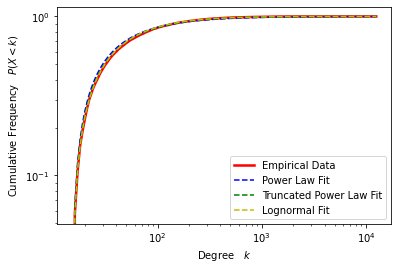

In [39]:
fig = fit.plot_cdf(color='r', linewidth=2.5, label="Empirical Data")
fit.power_law.plot_cdf(color='b', linestyle='--', ax=fig, label="Power Law Fit")
fit.truncated_power_law.plot_cdf(color='g', linestyle='--', ax=fig, label="Truncated Power Law Fit")
fit.lognormal.plot_cdf(color='y', linestyle='--', ax=fig, label="Lognormal Fit")
plt.xlabel("Degree   $k$")
plt.ylabel("Cumulative Frequency   $P(X < k)$")
plt.legend()
plt.show()

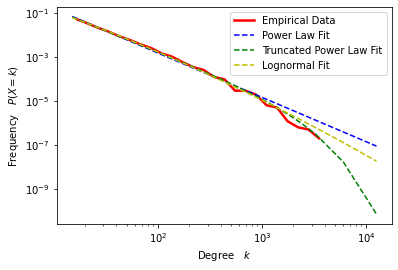

In [33]:
fig = fit.plot_pdf(color='r', linewidth=2.5, label="Empirical Data")
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig, label="Power Law Fit")
fit.truncated_power_law.plot_pdf(color='g', linestyle='--', ax=fig, label="Truncated Power Law Fit")
fit.lognormal.plot_pdf(color='y', linestyle='--', ax=fig, label="Lognormal Fit")
plt.xlabel("Degree   $k$")
plt.ylabel("Frequency   $P(X = k)$")
plt.legend()
plt.show()

In [26]:
# stretched exponential = Weibull
R, p = fit.distribution_compare(
    'truncated_power_law',
    'power_law',
    normalized_ratio=True)
print (R, p)

4.085426966392108 0.0


Assuming nested distributions


In [30]:
# stretched exponential = Weibull
R, p = fit.distribution_compare(
    'truncated_power_law',
    'lognormal',
    normalized_ratio=True)
print (R, p)

1.0898541795512409 0.2757773833002125


C:\Users\lmccabe\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [31]:
# stretched exponential = Weibull
R, p = fit.distribution_compare(
    'truncated_power_law',
    'exponential',
    normalized_ratio=True)
print (R, p)

10.522496417127819 6.804634921023521e-26


C:\Users\lmccabe\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


In [34]:
# stretched exponential = Weibull
R, p = fit.distribution_compare(
    'truncated_power_law',
    'stretched_exponential',
    normalized_ratio=True)
print (R, p)

0.836837809748159 0.402683741335924
